In [91]:
import pandas as pd
import matplotlib.pyplot as plt

## Leitura do CSV

In [152]:
df = pd.read_csv('../data/input/read-database-licitacao.csv', delimiter = ';')

/mnt/c/Programming/IC/M04/2021-python/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (50,51,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Filtragem das Licitações por Cidade

### Número de Licitações Por Cidade

#### Tabela

In [196]:
licitacoesPorCidade = df[['nome_cidade_show', 'id_licitacao']].rename({'nome_cidade_show': 'Nome da Cidade'}, axis='columns').groupby(['Nome da Cidade']).size().reset_index(name="Número de Licitações")
licitacoesPorCidade

,Nome da Cidade,Número de Licitações
0,ABADIA DOS DOURADOS,297
1,ABAETE,357
2,ABRE CAMPO,378
3,ACAIACA,345
4,ACUCENA,303
...,...,...
848,VIRGINOPOLIS,331
849,VIRGOLANDIA,122
850,VISCONDE DO RIO BRANCO,603
851,VOLTA GRANDE,266


#### Gráfico

<AxesSubplot:xlabel='Municípios', ylabel='Número de Licitações'>

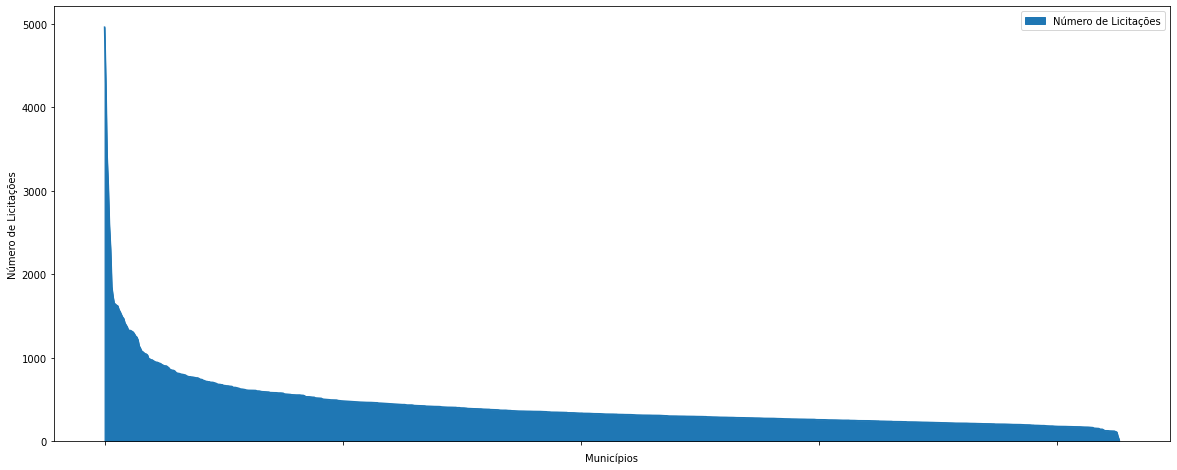

In [184]:
plotagemGraficoCidade = licitacoesPorCidade.sort_values(by = ['Número de Licitações'], ascending = False).plot(x = "Nome da Cidade", y = 'Número de Licitações', kind="area", figsize=(20, 8))
plotagemGraficoCidade.set_xticklabels([])
plotagemGraficoModalidade.xaxis.label.set_size(15)
plotagemGraficoModalidade.yaxis.label.set_size(15)
plotagemGraficoCidade.set_xlabel('Municípios')
plotagemGraficoCidade.set_ylabel('Número de Licitações')
plotagemGraficoCidade

### Top 10 Cidades com Mais Licitações

In [202]:
licitacoesPorCidade.sort_values(by = ['Número de Licitações'], ascending = False).head(10)

,Nome da Cidade,Número de Licitações
824,UBERLANDIA,4962
65,BELO HORIZONTE,4286
823,UBERABA,3429
605,POCOS DE CALDAS,3065
506,MURIAE,2582
834,VARGINHA,2302
493,MONTE ALEGRE DE MINAS,1852
382,ITAUNA,1738
362,ITABIRITO,1653
280,EXTREMA,1644


### Top 10 Cidades com Menos Licitações

In [201]:
licitacoesPorCidade.sort_values(by = ['Número de Licitações']).head(10)

,Nome da Cidade,Número de Licitações
845,VIEIRAS,18
33,ANTONIO PRADO DE MINAS,57
772,SENADOR CORTES,111
801,TAPIRAI,115
849,VIRGOLANDIA,122
150,CARMESIA,122
402,JENIPAPO DE MINAS,123
497,MONTE FORMOSO,124
804,TEIXEIRAS,124
509,NACIP RAYDAN,126


## Filtragem das Licitações por Modalidade

### Número de Licitações Por Modalidade

#### Tabela

In [159]:
licitacoesPorModalidade = df[['nome_modalidade_show', 'id_licitacao']].rename({'nome_modalidade_show': 'Modalidade'}, axis='columns').groupby(['Modalidade']).size().reset_index(name="Número de Licitações")
licitacoesPorModalidade

,Modalidade,Número de Licitações
0,CONCORRENCIA,5627
1,CONCURSO,88
2,CONVITE,24588
3,LEILAO,667
4,PREGAO ELETRONICO,18947
5,PREGAO PRESENCIAL,286243
6,TOMADA DE PRECOS,27412


#### Gráfico

<AxesSubplot:xlabel='Municípios', ylabel='Número de Licitações'>

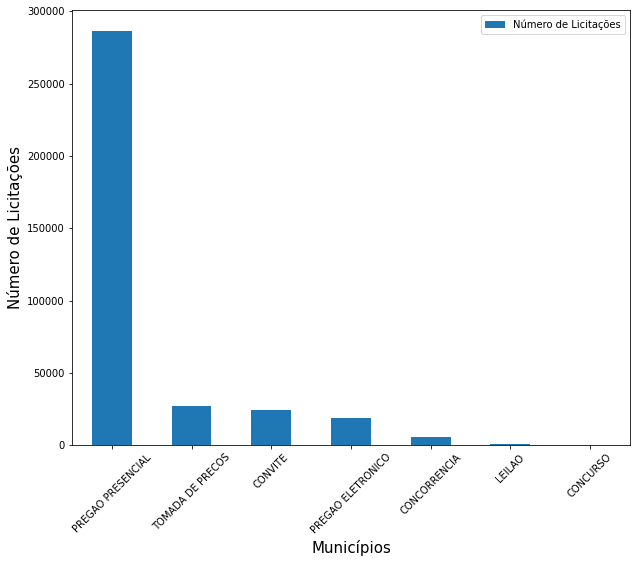

In [183]:
plotagemGraficoModalidade = licitacoesPorModalidade.sort_values(by = ['Número de Licitações'], ascending = False).plot(x = "Modalidade", y = 'Número de Licitações', kind="bar", figsize=(10, 8))
plotagemGraficoModalidade.set_xlabel('Municípios')
plotagemGraficoModalidade.set_ylabel('Número de Licitações')
plotagemGraficoModalidade.xaxis.label.set_size(15)
plotagemGraficoModalidade.yaxis.label.set_size(15)
plotagemGraficoModalidade.tick_params(axis='x', labelrotation=45)
plotagemGraficoModalidade

## Filtragem das Licitações por Ano

### Número de Licitações Por Ano

#### Tabela

In [204]:
licitacoesPorAno = df[['ano_processo', 'id_licitacao']].rename({'ano_processo': 'Ano da Licitação'}, axis='columns').groupby(['Ano da Licitação']).size().reset_index(name="Número de Licitações").sort_values(by = ['Ano da Licitação'], ascending = False)
licitacoesPorAno

,Ano da Licitação,Número de Licitações
13,2020,28843
12,2019,54426
11,2018,55622
10,2017,60876
9,2016,44382
8,2015,52243
7,2014,62861
6,2013,4157
5,2012,64
4,2011,43


#### Gráfico

<AxesSubplot:xlabel='Ano da Licitação', ylabel='Número de Licitações'>

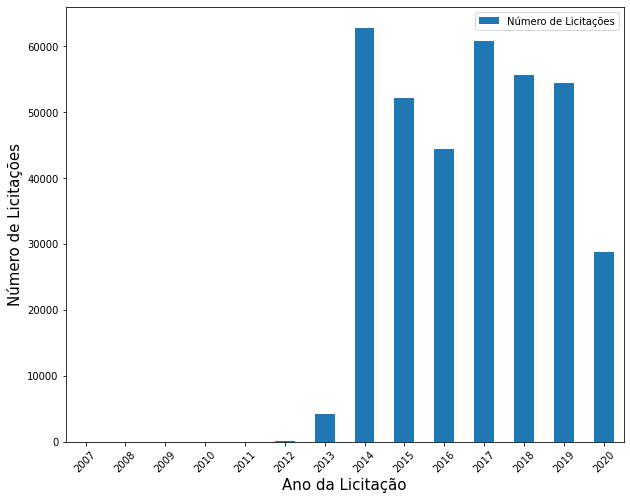

In [195]:
plotagemGraficoAno = licitacoesPorAno.sort_values(by = ['Ano da Licitação']).plot(x = "Ano da Licitação", y = 'Número de Licitações', kind="bar", figsize=(10, 8))
plotagemGraficoAno.set_xlabel('Ano da Licitação')
plotagemGraficoAno.set_ylabel('Número de Licitações')
plotagemGraficoAno.xaxis.label.set_size(15)
plotagemGraficoAno.yaxis.label.set_size(15)
plotagemGraficoAno.tick_params(axis='x', labelrotation=45)
plotagemGraficoAno